### Statistics Lab 

Why are our best and most experienced employees leaving prematurely? Have fun with this database and try to predict which valuable employees will leave next. Fields in the dataset include:

* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Department
* Salary
* Whether the employee has left

** This dataset is simulated **

Obtained from Kaggle https://www.kaggle.com/ludobenistant/hr-analytics

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
hr = pd.read_csv("data/HR_comma_sep.csv")

In [4]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### 1. What is the mean average monthly hours worked by an employee? 

In [10]:
hr.average_monthly_hours.mean()




201.0503366891126

#### 2. What is the median satisfaction level for employees?

In [11]:
hr.satisfaction_level.mean()


0.6128335222348166

#### 3. What is the most common / mode number of projects worked on?

In [13]:
hr.number_project.mode()


0    4
dtype: int64

#### 4. Create boxplots of satisfaction level and last evaluation 

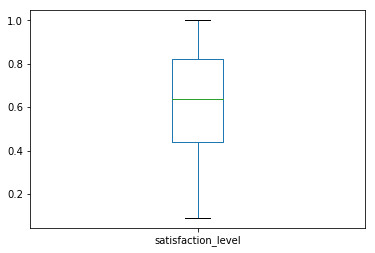

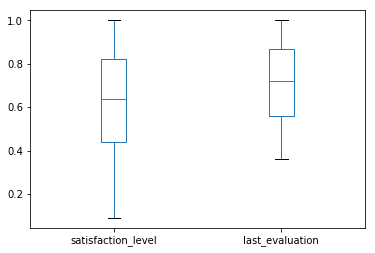

In [19]:
hr.satisfaction_level.plot(kind='box')

#hr.last_evaluation.plot(kind='box')
hr[["satisfaction_level", "last_evaluation"]].plot(kind='box')   #type of plot to be box plot 



#### 5. What is the correlation between employee satisfaction and their last evaluation?

In [32]:
hr[["satisfaction_level", "last_evaluation"]].corr()




,satisfaction_level,last_evaluation
satisfaction_level,1.000000,0.105021
last_evaluation,0.105021,1.000000


#### 6. Plot a histogram of the average monthly hours with 20 bins

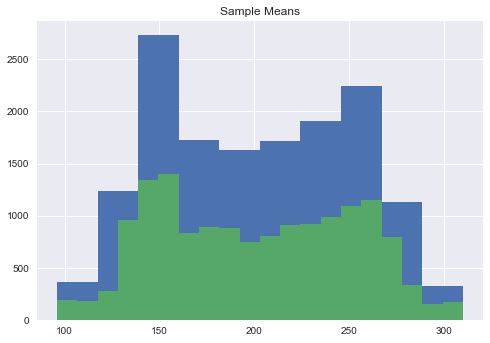

In [59]:
hr["average_monthly_hours"].hist()

plt.hist(hr.average_monthly_hours, bins=20)
plt.title("Sample Means")
plt.show()


#### 7. Plot a density plot of the satisfaction level

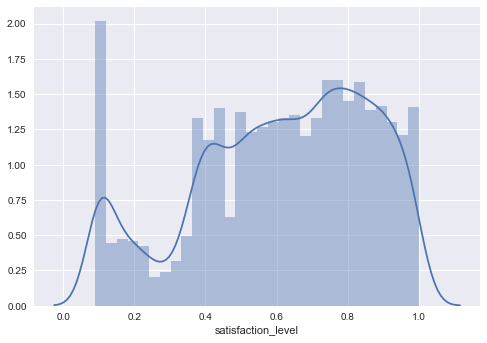

In [29]:
import seaborn as sns
sns.distplot(hr.satisfaction_level)
sns.plt.show()

#### 8. What is the Skew and Kurtosis of the average monthly hours variable?

In [30]:
hr.average_monthly_hours.skew()

0.052841989416324203

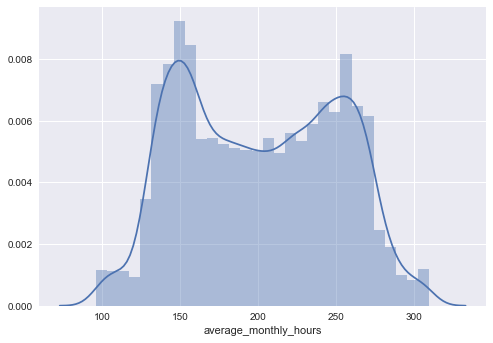

-1.1349815681924558

In [33]:
sns.distplot(hr.average_monthly_hours)
sns.plt.show()

hr.average_monthly_hours.kurtosis()


#### 9. Which variable has the highest correlation with whether the employee has left?

In [64]:
hr.corr()["left"].sort_values(ascending=True)[:5].abs()

satisfaction_level       0.388375
work_accident            0.154622
promotion_last_5years    0.061788
last_evaluation          0.006567
number_project           0.023787
Name: left, dtype: float64

#### 10. Which departments have the most number of employees who have left? 

In [72]:

    
hr[(hr.left == 1) & (hr.last_evaluation >0.5) ]


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,...,Department_technical,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
6,0.10,0.77,6,247,4,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
7,0.92,0.85,5,259,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
8,0.89,1.00,5,224,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
9,0.42,0.53,2,142,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
10,0.45,0.54,2,135,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0


In [73]:
hr[hr.left == 1].department.value_counts()[:10]

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

#### 11. Which column(s) requires dummy variables? Create the dummy variables for the column and append to the dataset

In [71]:
# create a new Series called IsLarge



dept_dummies = pd.get_dummies(hr.department, prefix='Department', drop_first=True)
hr = pd.concat([hr, dept_dummies], axis=1)

salary_groups = {"low", "medium", "high" } 

#hr salary index =) }


hr.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5years,department,salary,...,Department_technical,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,0,0,1,0,0
